# Case study 2

In [196]:
# importing the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns # for plotting

%matplotlib inline

## reading the csv

In [197]:
df = pd.read_csv("casestudy.csv")

## initial inspection

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


## first rows

In [199]:
df.head(10)

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
5,5,mobvusnzfr@gmail.com,39.44,2015
6,6,kxwkqvacsv@gmail.com,171.46,2015
7,7,iqmnugdcjs@gmail.com,111.99,2015
8,8,baiikostmd@gmail.com,170.70,2015
9,9,lfeafnigbu@gmail.com,54.99,2015


## Renaming columns

In [200]:
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)
df.customer_email.astype('str')

0          nhknapwsbx@gmail.com
1          joiuzbvcpn@gmail.com
2          ukkjctepxt@gmail.com
3          gykatilzrt@gmail.com
4          mmsgsrtxah@gmail.com
                  ...          
685922     qzqttwiftu@gmail.com
685923     pjodiifjop@gmail.com
685924     appaplmgko@gmail.com
685925     wvkpmwsgck@gmail.com
685926     aregboumbw@gmail.com
Name: customer_email, Length: 685927, dtype: object

## Inspecting for Missing values

In [201]:
df.isna().sum()

id                0
customer_email    0
net_revenue       0
year              0
dtype: int64

## Number of records per year

In [202]:
df.year.value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

## Total revenue for the current year

In [273]:
df.groupby(['year']).sum(['net_revenue']).drop('id', axis=1)

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


The Revenue of 2017 is $31417495

The Revenue of 2016 is $25730943

The Revenue of 2015 is $29036749

## New Customer Revenue e.g. new customers not present in previous year only

In [236]:
year2017 = df.loc[df['year'] == 2017]
year2016 = df.loc[df['year'] == 2016]
year2015 = df.loc[df['year'] == 2015]

def anti_join(x, y, on):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True, on=on)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    return ans

anti2017 = anti_join(year2017, year2016, on='customer_email')
anti2016 = anti_join(year2016, year2015, on='customer_email')

In [270]:
print("New customer revenue for 2017 is", anti2017.net_revenue_x.sum())

New customer revenue for 2017 is 28776235.039999995


In [271]:
print("New customer revenue for 2016 is", anti2016.net_revenue_x.sum())

New customer revenue for 2016 is 18245491.01


The Revenue of 2015 is $29036749

## Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [260]:
gb = df.groupby(['year']).sum(['net_revenue'])

,id,net_revenue
year,,
2015,26748341571,29036749.19
2016,68273282259,25730943.59
2017,140225957871,31417495.03


In [269]:
print("Growth of customers from 2016 to 2017", gb["net_revenue"].iloc[2] - gb["net_revenue"].iloc[1])

Growth of customers from 2016 to 2017 5686551.440000001


In [268]:
print("Growth of customers from 2015 to 2015", gb["net_revenue"].iloc[1] - gb["net_revenue"].iloc[0])

Growth of customers from 2015 to 2015 -3305805.6000000015


## Plots

<AxesSubplot:xlabel='year'>

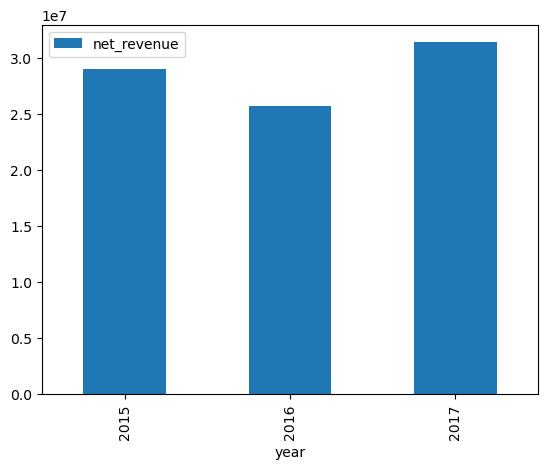

In [276]:
df.groupby(['year']).sum(['net_revenue']).drop('id', axis=1).plot(kind='bar')

It seems that there the number of customers' orders in 2016 was reduced compared to the rest of the other years.